In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

/home/anish/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


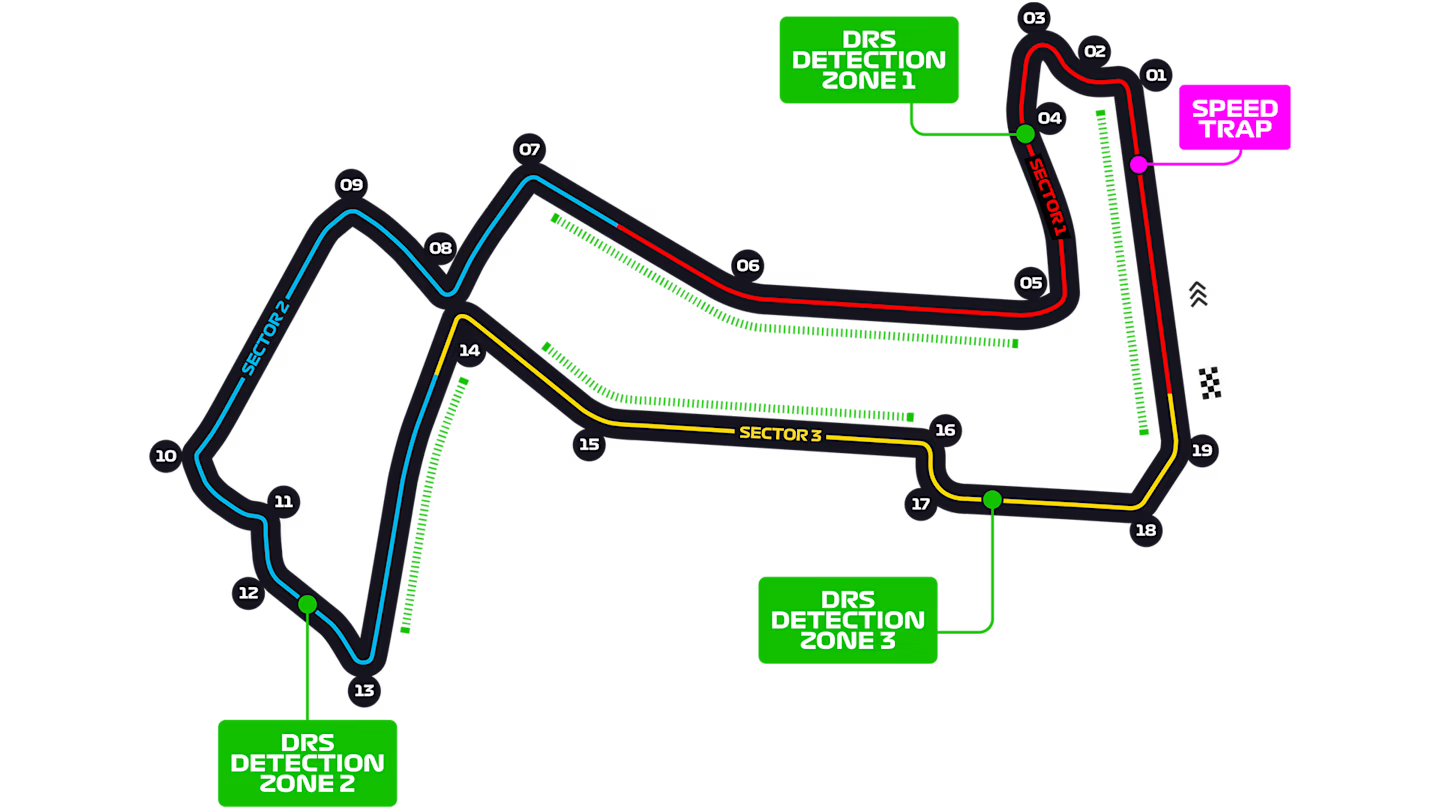

In [2]:
from IPython.display import Image
Image(filename='Singapore_Circuit.png') 

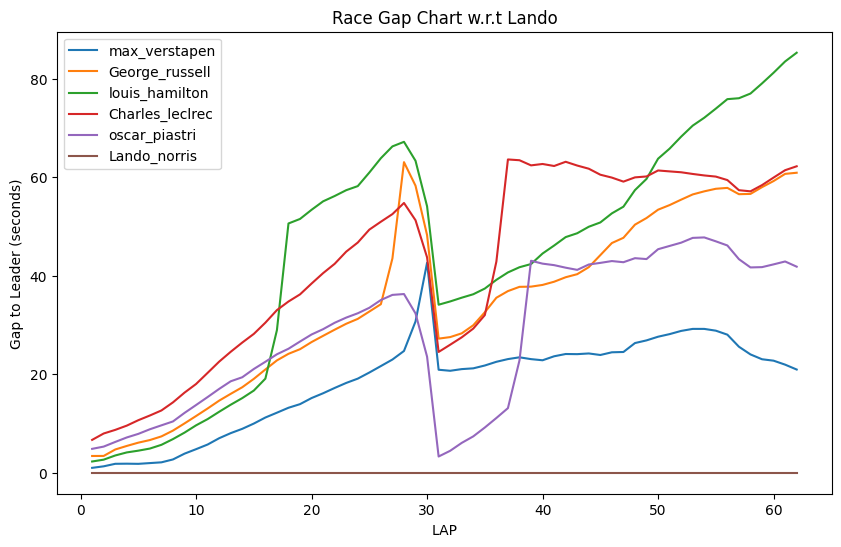

In [3]:
# Load the Excel file with multiple sheets
fp1 = 'sgp24.ods'  # Replace with the actual file path
dfs = pd.read_excel(fp1, sheet_name=None)

# Assuming each sheet corresponds to a driver
driver_names = list(dfs.keys())  # Get the driver names from the sheet names

# Initialize an empty dictionary to store DataFrames for each driver
data = {}

# Loop through each sheet (driver's data) and calculate the gap to leader
for driver in driver_names:
    data[driver] = dfs[driver]
    # Ensure the columns are appropriately named in your sheets, e.g., 'Lap' and 'Fuel Corrected Lap Time'
    data[driver]['Ctime'] = data[driver]['ftime'].cumsum()

# Now calculate the gap to the leader at each lap (assuming the first driver is the leader)
leader = driver_names[5]  # Assuming the first driver in the sheet list is the leader
for driver in driver_names:
    data[driver]['GapL'] = data[driver]['Ctime'] - data[leader]['Ctime']

# Plot the data
plt.figure(figsize=(10, 6))

for driver in driver_names:
    plt.plot(data[driver]['LAP'], data[driver]['GapL'], label=driver)
    

# Add labels, title, and legend
plt.xlabel('LAP')
plt.ylabel('Gap to Leader (seconds)')
plt.title('Race Gap Chart w.r.t Lando')
plt.legend()
# Show the plot
plt.show()

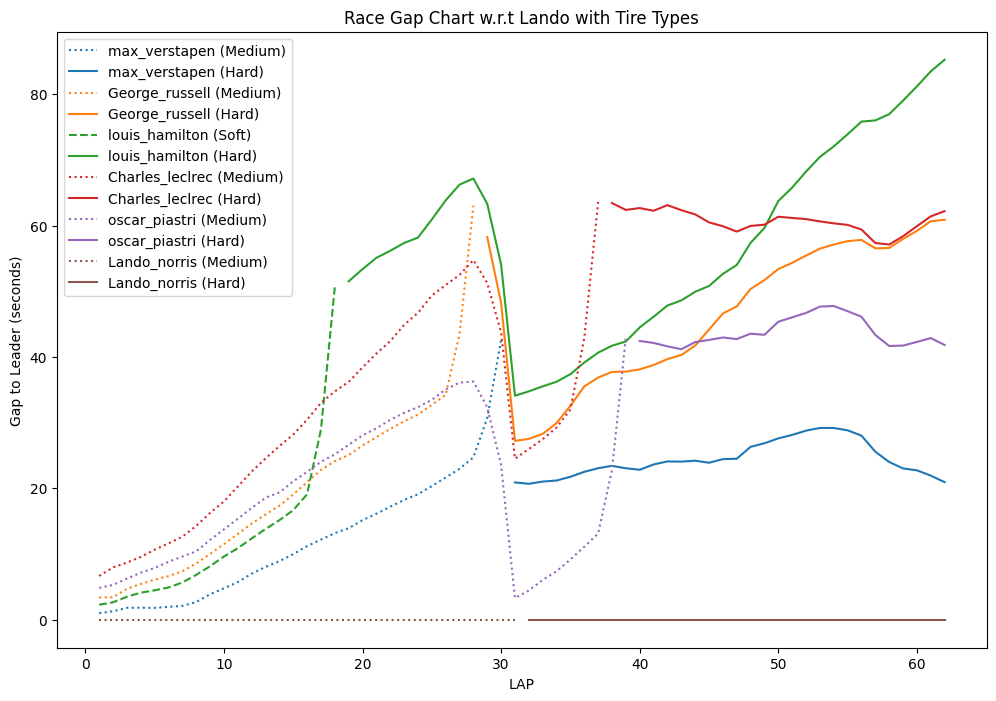

In [4]:
# Initialize an empty dictionary to store DataFrames for each driver
dt = {}

# Loop through each sheet (driver's data) and calculate the cumulative time (Ctime)
for driver in driver_names:
    dt[driver] = dfs[driver]
    # Ensure the columns are appropriately named in your sheets, e.g., 'Lap' and 'Fuel Corrected Lap Time'
    dt[driver]['Ctime'] = dt[driver]['ftime'].cumsum()

# Assume the last driver is the leader (or adjust accordingly)
leader = driver_names[5]  # Assuming the sixth driver is the leader
for driver in driver_names:
    dt[driver]['GapL'] = dt[driver]['Ctime'] - dt[leader]['Ctime']

# Define line styles for different tire types
tire_styles = {
    'Soft': 'dashed',
    'Medium': 'dotted',
    'Hard': 'solid'
}

# Plot the data
plt.figure(figsize=(12, 8))

# Assign colors to each driver based on matplotlib's color cycle
colors = plt.cm.tab10(range(len(driver_names)))

for idx, driver in enumerate(driver_names):
    # Use color based on the driver index
    color = colors[idx]

    # Plot by tire type without breaking the continuity of lines
    for tire_type in dt[driver]['Tire'].unique():
        # Filter data by tire type
        tire_data = dt[driver][dt[driver]['Tire'] == tire_type]
        # Plot with the specified line style for each tire type
        plt.plot(
            tire_data['LAP'],
            tire_data['GapL'],
            label=f"{driver} ({tire_type})",
            linestyle=tire_styles.get(tire_type, 'solid'),  # Default to solid if tire type is missing
            color=color
        )

# Add labels, title, and legend
plt.xlabel('LAP')
plt.ylabel('Gap to Leader (seconds)')
plt.title('Race Gap Chart w.r.t Lando with Tire Types')
plt.legend()
plt.show()

In [5]:
 fp = 'sgp24.ods'  # Replace with the actual file path
 dft = pd.read_excel(fp, sheet_name='oscar_piastri')
# driver_names = list(dff.keys())
# data = {}
# for driver in driver_names:
#     data[driver] = dff[driver]
#dff = dfs.drop([39,40])
#dfs

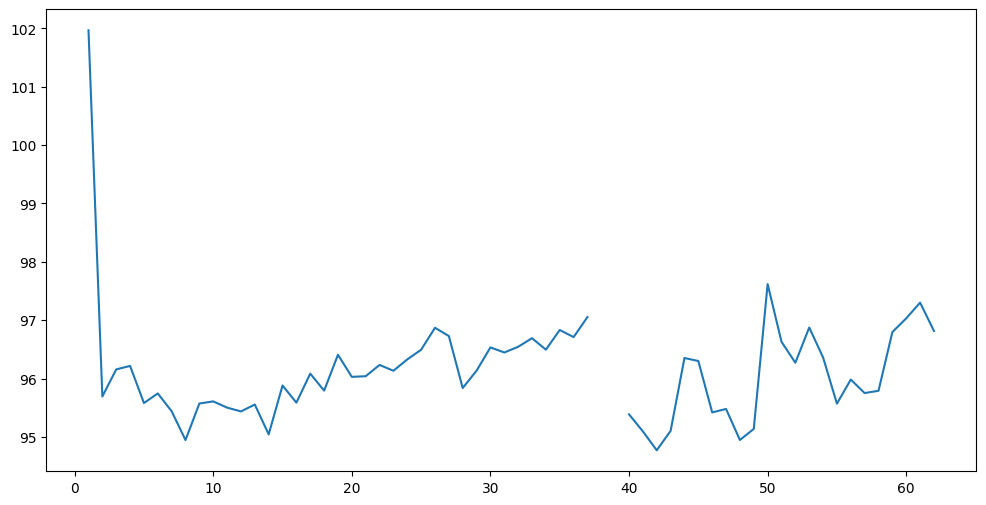

In [6]:
LAP = dft['LAP'] 
dft['Ftime'] = dft['ftime']
dft.loc[dft['Pitstop'] == 1, 'Ftime'] = float('NaN')
FTIME = dft['Ftime']
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
# for driver in driver_names:
#     dff.loc[data[driver]['Pitstop'] == 1, 'Ftime'] = float('NaN')
#     FTIME = data[driver]['Ftime']
#     plt.plot(data[driver]['LAP'], data[driver]['Ftime'], label=driver)
#plt.legend()
#data = np.asarray(FTIME).reshape(62,1)
#plt.yticks(np.arange(90,94,98))
plt.plot(LAP,FTIME)
plt.show()

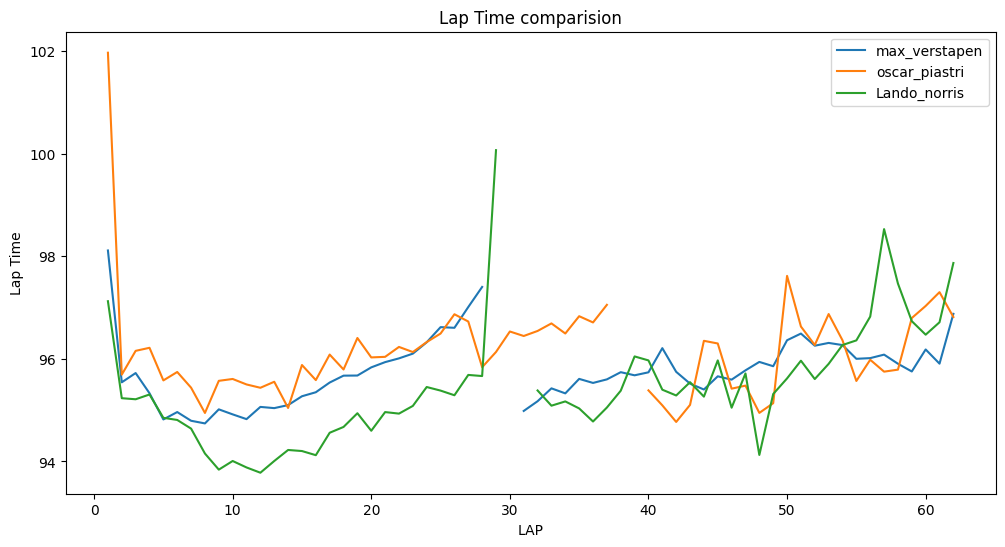

In [7]:

# Load the Excel file with multiple sheets
fp2 = 'sgp24_laptime.ods'  # Update this with the actual file path
dff = pd.read_excel(fp2, sheet_name=None)  # Load all sheets

plt.figure(figsize=(12, 6))  # Set figure size

# Loop through each driver's sheet and plot
for driver_name, df in dff.items():
    # Ensure there’s a 'LAP', 'ftime', and 'PitStop' column in each driver’s data
    if 'LAP' in df.columns and 'ftime' in df.columns and 'Pitstop' in df.columns:
        df['Ftime'] = df['ftime']  # Copy of 'ftime' column

        # Set 'ftime' to NaN for pit stop laps to create discontinuous lines
        df.loc[df['Pitstop'] == 1, 'Ftime'] = float('NaN')
        
        # Plot each driver's lap time, handling discontinuities at pit stops
        plt.plot(
            df['LAP'], 
            df['Ftime'], 
            label=driver_name
        )
    else:
        print(f"Required columns missing in {driver_name}")

# Customize the plot
plt.xlabel('LAP')
plt.ylabel('Lap Time')
plt.title('Lap Time comparision')
plt.legend()
plt.show()


In [8]:
z = pd.read_excel("sgp24_sector.ods", engine="odf", sheet_name=None)
pd.options.display.max_columns = None

In [9]:
driver_s= list(z.keys())  # Get the driver names from the sheet names

# Initialize an empty dictionary to store DataFrames for each driver
da = {}

# Loop through each sheet (driver's data) and calculate the gap to leader
for dr in driver_s:
    da[dr] = z[dr]
tt = da['oscar_p3'].dropna()
tt

,LAP,TIME1,SPEED1,TIME2,SPEED2,TIME3,SPEED3,LAPTIME
2,3,27.658,305.5,39.205,274.3,26.094,254.2,1:32.957
3,4,42.918,152.2,71.021,96.5,48.994,257.1,2:42.933
4,5,27.368,306.9,38.912,274.8,25.901,253.8,1:32.181
5,6,46.858,145.2,65.089,115.3,40.976,254.3,2:32.923
6,7,27.364,306.4,38.766,274.8,26.049,256.1,1:32.179
9,10,26.810,311.5,38.202,278.7,25.419,260.4,1:30.431
12,13,26.879,311.5,38.276,278.3,25.654,260.3,1:30.809
15,16,32.011,284.8,50.834,177.9,44.455,46.9,2:07.300


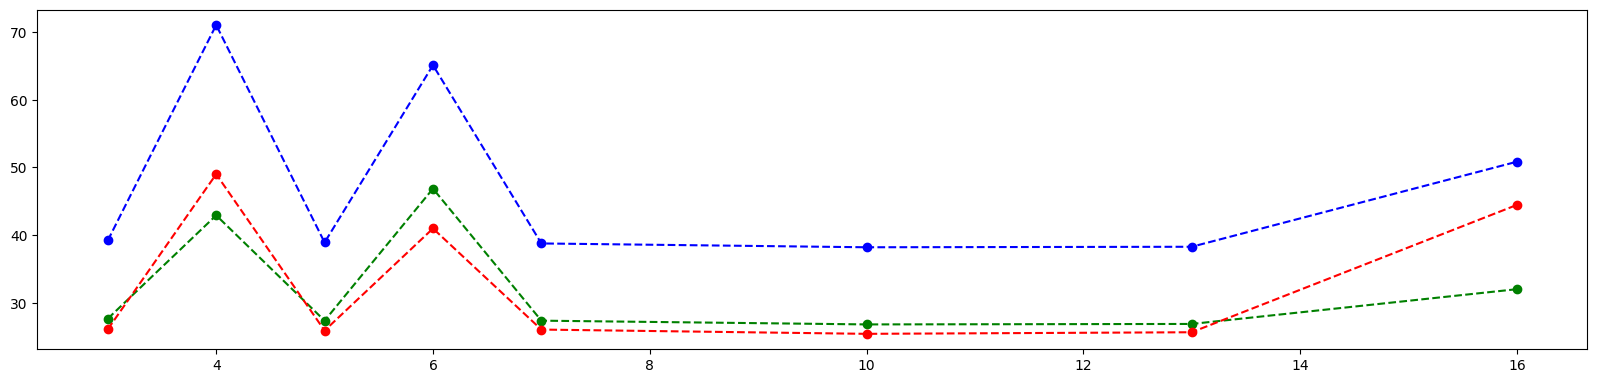

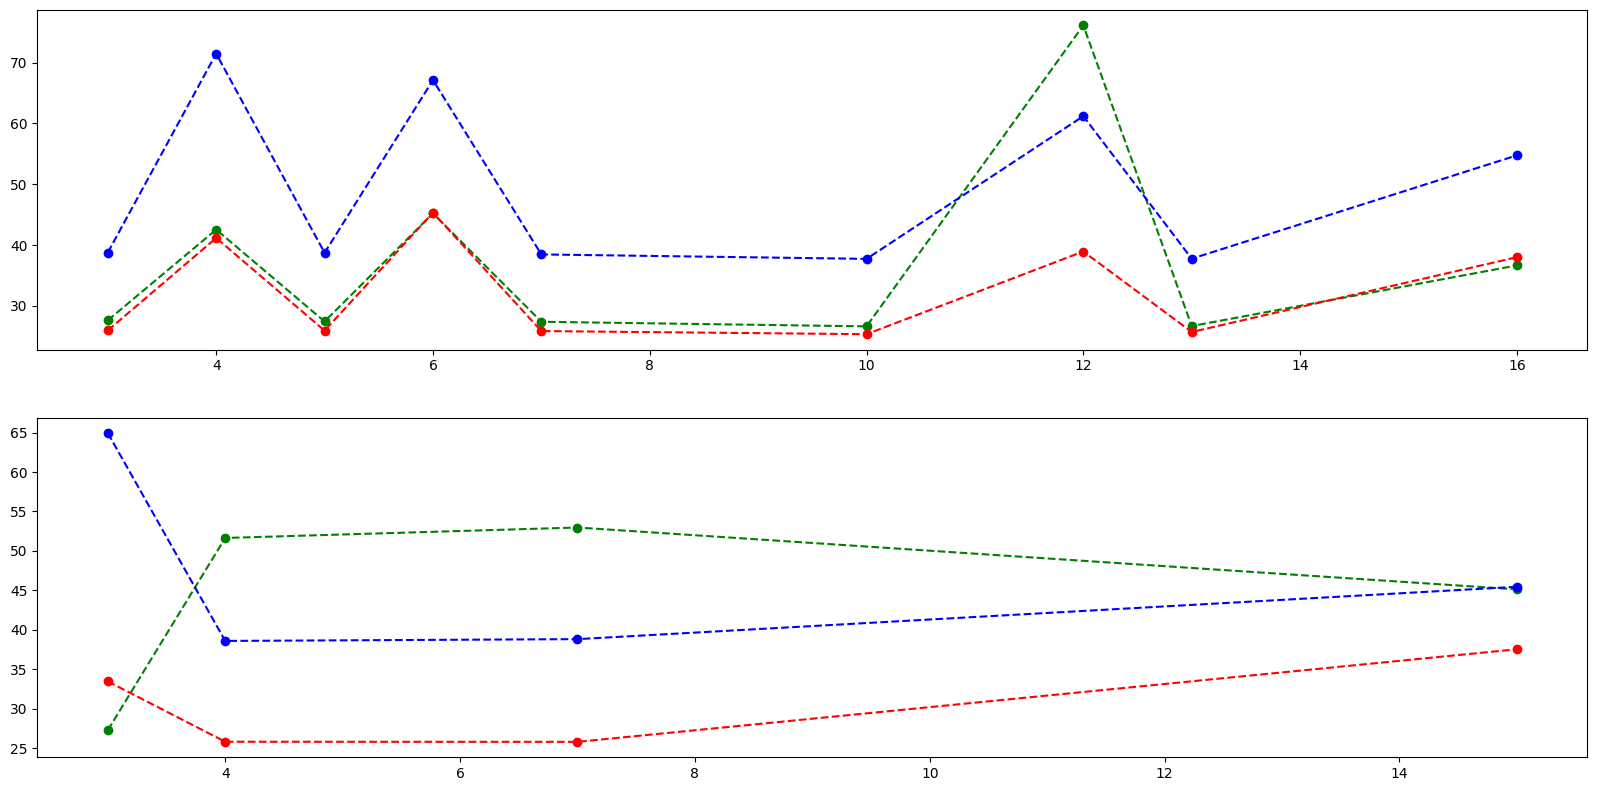

In [10]:
LAP = tt['LAP']
TIME = tt['TIME1']
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(LAP,TIME,'--og')
LAP = tt['LAP']
TIME = tt['TIME2']
plt.plot(LAP,TIME,'--ob')
LAP = tt['LAP']
TIME = tt['TIME3']
plt.plot(LAP,TIME, '--or')


tz = da['lando_p3'].dropna()
LAP = tz['LAP']
TIME = tz['TIME1']
plt.figure(figsize=(20,15))
plt.subplot(3,1,2)
plt.plot(LAP,TIME,'--og')
LAP = tz['LAP']
TIME = tz['TIME2']
plt.plot(LAP,TIME,'--ob')
LAP = tz['LAP']
TIME = tz['TIME3']
plt.plot(LAP,TIME, '--or')


#ts = da['max_p2'].dropna()
ts = da['max_p3'].drop(da['max_p3'].index[[7,10,13]],axis=0)
ts = ts.dropna()
LAP = ts['LAP']
TIME = ts['TIME1']
plt.subplot(3,1,3)
plt.plot(LAP,TIME,'--og')
LAP = ts['LAP']
TIME = ts['TIME2']
plt.plot(LAP,TIME,'--ob')
LAP = ts['LAP']
TIME = ts['TIME3']
plt.plot(LAP,TIME, '--or')
# ts

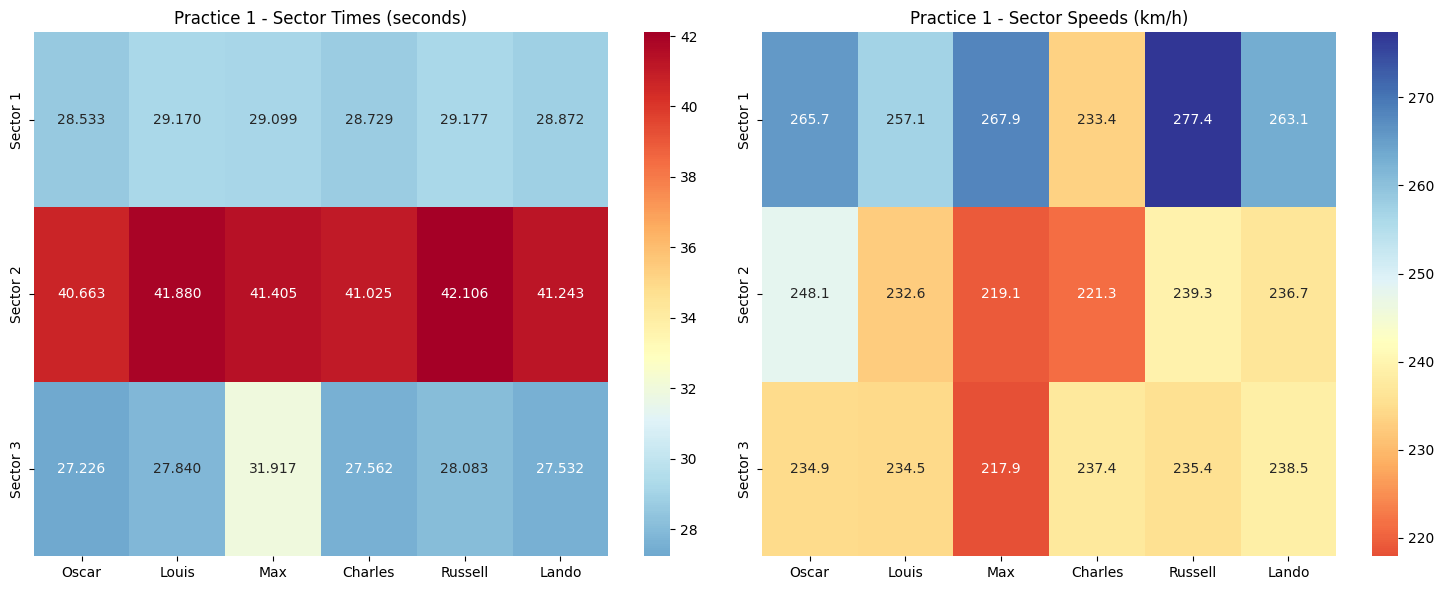

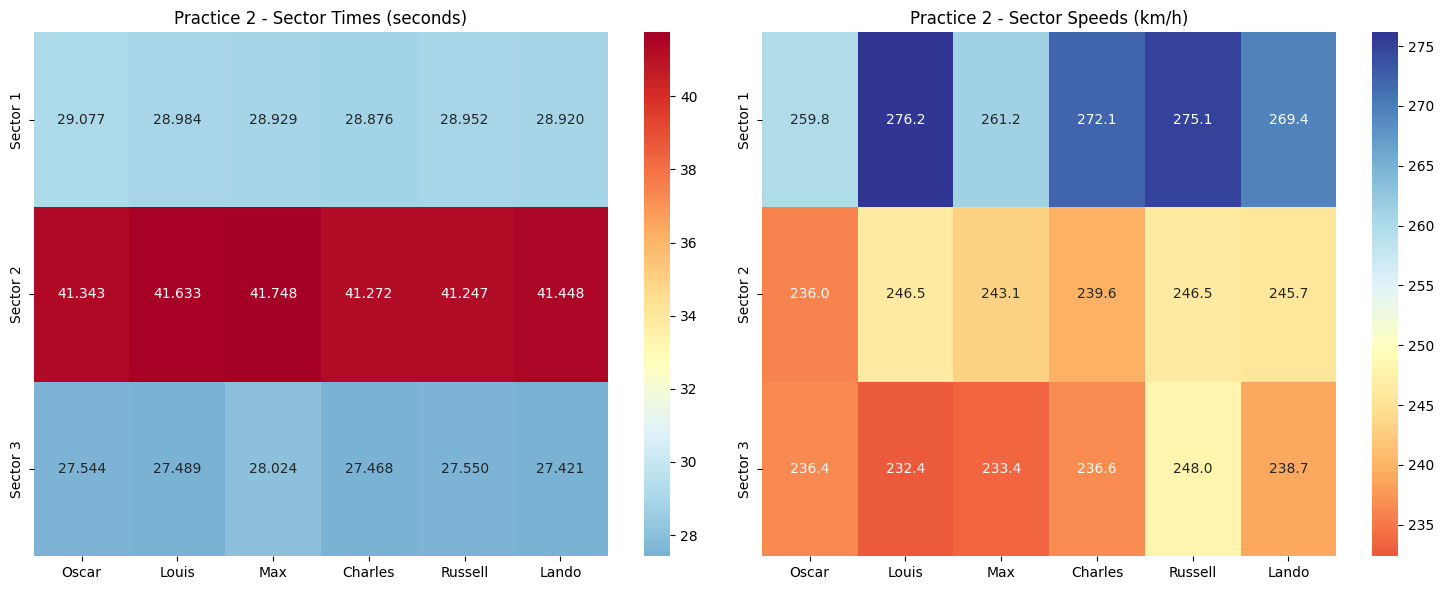

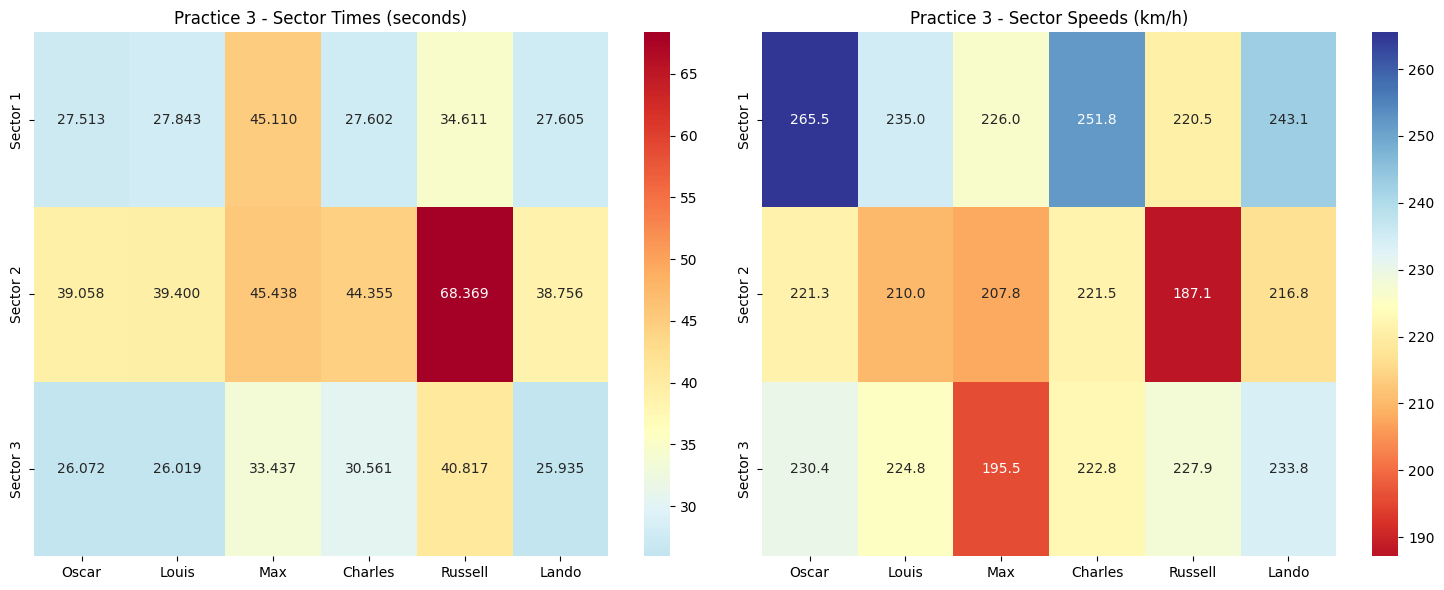

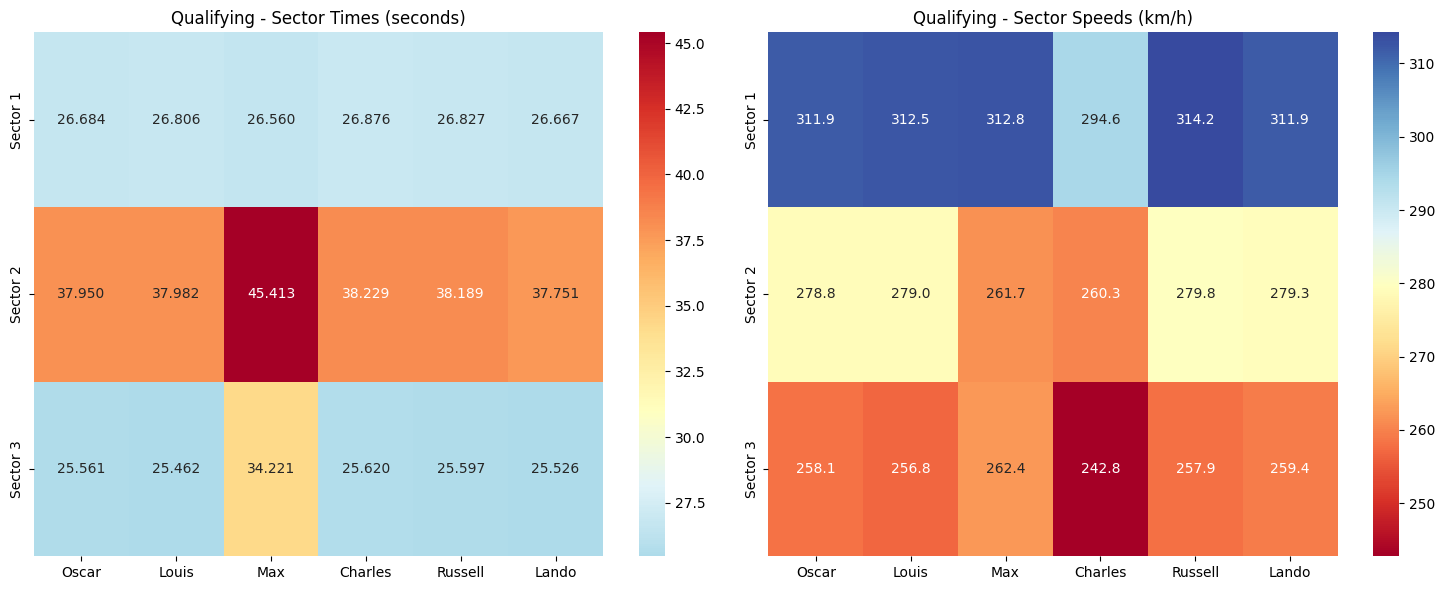

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def clean_session_data(df):
    """
    Clean session data by removing pit stops and empty values
    """
    # Drop rows with any missing values
    df = df.dropna()
    """
    # Calculate z-scores for sector times
    for sector in ['TIME1', 'TIME2', 'TIME3']:
        z_scores = np.abs((df[sector] - df[sector].mean()) / df[sector].std())
        # Mark as pit stop if z-score > 3 (unusually high sector time)
        df = df[z_scores < 3]
    """
    return df

def combine_session_data(excel_file, drivers, session_type):
    """
    Combine data from individual driver sheets for a specific session
    """
    combined_data = []
    
    for driver in drivers:
        sheet_name = f"{driver.lower()}_{session_type.lower()}"
        try:
            # Read the specific sheet
            df = pd.read_excel(excel_file, sheet_name=sheet_name)
            # Add driver column
            df['DRIVER'] = driver
            # Clean the data
            df = clean_session_data(df)
            combined_data.append(df)
        except Exception as e:
            print(f"Error reading sheet {sheet_name}: {e}")
    
    # Combine all drivers' data
    if combined_data:
        return pd.concat(combined_data, ignore_index=True)
    return None

def create_sector_heatmaps(session_data, session_name):
    """
    Create heatmaps for sector times and speeds
    """
    # Calculate average sector times and speeds for each driver
    sector_times = pd.DataFrame()
    sector_speeds = pd.DataFrame()
    
    drivers = session_data['DRIVER'].unique()
    
    # Calculate averages for each sector
    for driver in drivers:
        driver_data = session_data[session_data['DRIVER'] == driver]
        
        # Sector times
        sector_times[driver] = [
            driver_data['TIME1'].median(),
            driver_data['TIME2'].median(),
            driver_data['TIME3'].median()
        ]
        
        # Sector speeds
        sector_speeds[driver] = [
            driver_data['SPEED1'].mean(),
            driver_data['SPEED2'].mean(),
            driver_data['SPEED3'].mean()
        ]
    
    sector_times.index = ['Sector 1', 'Sector 2', 'Sector 3']
    sector_speeds.index = ['Sector 1', 'Sector 2', 'Sector 3']
    
    # Create heatmaps
    plt.figure(figsize=(15, 6))
    
    # Sector Times Heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(sector_times, annot=True, fmt='.3f', cmap='RdYlBu_r', 
                center=sector_times.mean().mean())
    plt.title(f'{session_name} - Sector Times (seconds)')
    
    # Sector Speeds Heatmap
    plt.subplot(1, 2, 2)
    sns.heatmap(sector_speeds, annot=True, fmt='.1f', cmap='RdYlBu',
                center=sector_speeds.mean().mean())
    plt.title(f'{session_name} - Sector Speeds (km/h)')
    
    plt.tight_layout()
    plt.show()

def analyze_all_sessions(excel_file, drivers):
    """
    Analyze all sessions for all drivers
    """
    sessions = ['P1', 'P2', 'P3', 'Q']
    
    for session in sessions:
        # Combine data from all drivers for this session
        combined_session_data = combine_session_data(excel_file, drivers, session)
        
        if combined_session_data is not None:
            # Create heatmaps for this session
            session_names = {
                'P1': 'Practice 1',
                'P2': 'Practice 2',
                'P3': 'Practice 3',
                'Q': 'Qualifying'
            }
            create_sector_heatmaps(combined_session_data, session_names[session])

# Example usage:
# Define your Excel file path
excel_file = 'sgp24_sector.ods'

# List of drivers (adjust according to your data)
drivers = ['Oscar', 'Louis', 'Max', 'Charles', 'Russell', 'Lando']  # Add all your drivers

# Run the analysis
analyze_all_sessions(excel_file, drivers)

<Figure size 1000x600 with 0 Axes>

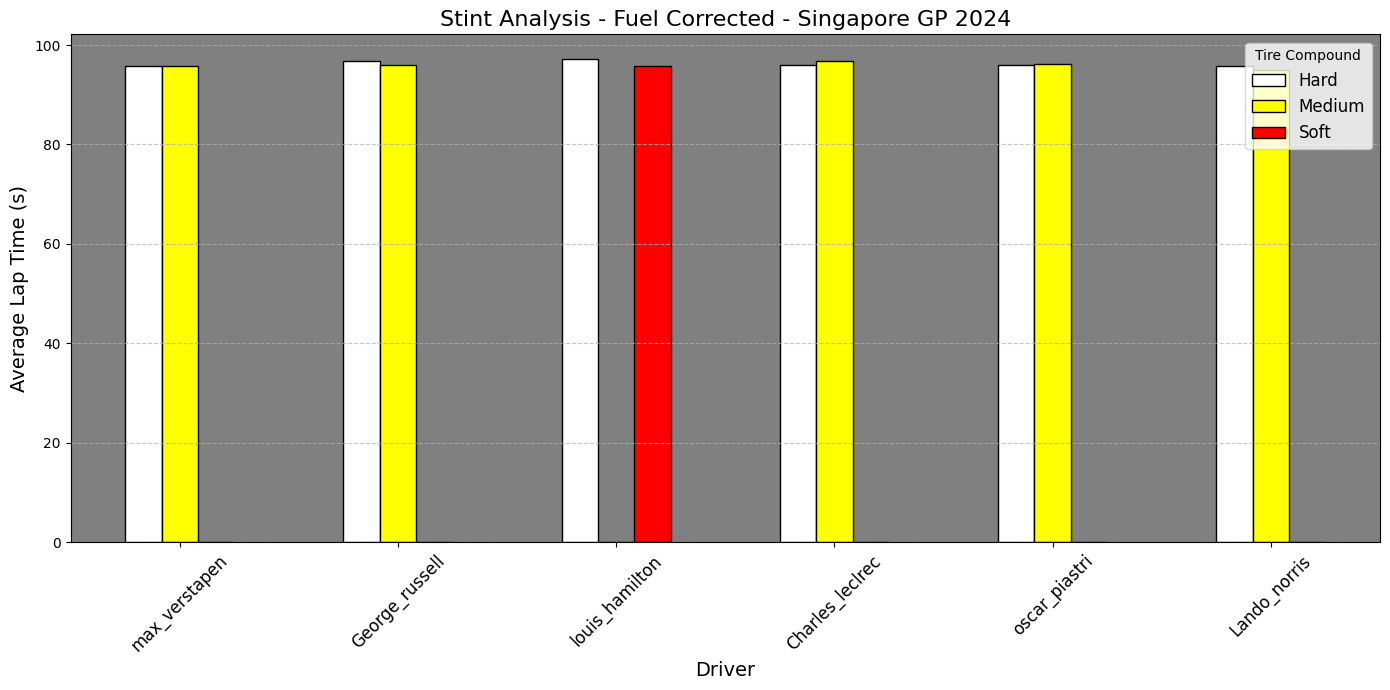

In [19]:
# Function to process stint data for each driver
def process_driver_data(driver_name, df):
    df = df.dropna(subset=['Tire'])  # Drop rows without tire data
    df = df[df['Pitstop'].isna()]  # Exclude laps with pit stops
    stint_data = df.groupby('Tire')['ftime'].mean()  # Average fuel-corrected time per tire
    return stint_data.rename(driver_name)

# Initialize a DataFrame to store stint analysis results
stint_analysis = pd.DataFrame()

# Process each sheet (driver data)
for driver_name, df in data.items():
    stint_data = process_driver_data(driver_name, df)
    stint_analysis = pd.concat([stint_analysis, stint_data], axis=1)

# Transpose for better readability
stint_analysis = stint_analysis.T

# Plotting the stint analysis
plt.figure(figsize=(10, 6))
stint_analysis.plot(kind='bar', figsize=(14, 7), color=['white', 'yellow', 'red'], edgecolor='black')
plt.gca().set_facecolor('grey')
plt.title('Stint Analysis - Fuel Corrected - Singapore GP 2024', fontsize=16)
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Average Lap Time (s)', fontsize=14)
plt.legend(title='Tire Compound', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

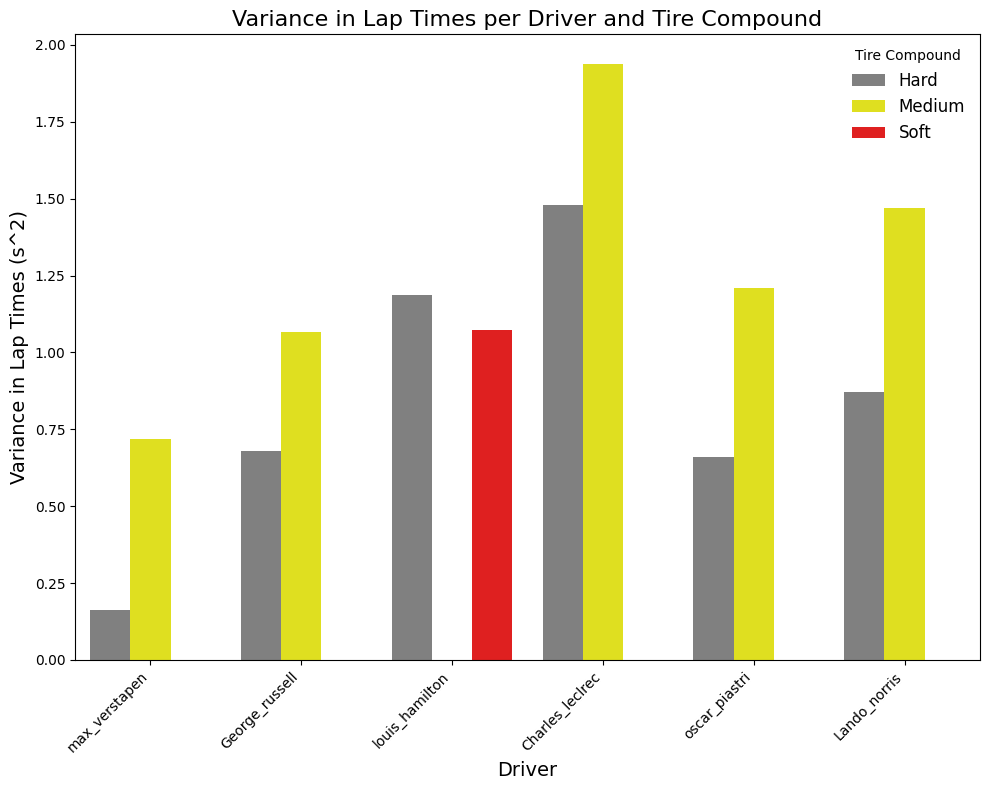

In [49]:
# Prepare data for variance analysis (per driver and tire compound)
variance_per_driver_tire = []

for driver_name, df in data.items():
    df = df.dropna(subset=['Tire'])  # Drop rows without tire data
    df = df[df['Pitstop'].isna()]  # Exclude laps with pit stops
    variance_data = df.groupby('Tire')['ftime'].var()  # Variance of fuel-corrected lap times
    for tire, var in variance_data.items():
        variance_per_driver_tire.append({'Driver': driver_name, 'Tire': tire, 'Variance': var})

# Convert to DataFrame for visualization
variance_df = pd.DataFrame(variance_per_driver_tire)

# Create a grouped bar chart for variance
plt.figure(figsize=(10, 8))
sns.barplot(data=variance_df, x='Driver', y='Variance', hue='Tire', palette=['grey', 'yellow', 'red'])
plt.title('Variance in Lap Times per Driver and Tire Compound', fontsize=16)
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Variance in Lap Times (s^2)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tire Compound', fontsize=12)
plt.tight_layout()
plt.show()
